# WFA Survey Analysis
### -- Correlation Matrix, Decision Tree, K means Clustering, Collaborative Filtering Recommendation
### Xinqi (Fortuna) Zhang, WashU MSBA 2020

In [404]:
import sys
print(sys.version)
import numpy as np
import pandas as pd

3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [257]:
df = pd.read_csv('Data/survey_results_numbers.csv')

In [258]:
df.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,Q15_13_TEXT,Q16,Q16_8_TEXT,Q17,Q18,Q19,Q20,Q21,Q8_4_17 - Topics,Q8_4_17 - Parent Topics
0,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,"Out of the listed companies, which do you pref...",What are the advantages of the company you cho...,What are the advantages of the company you cho...,What is your year of birth?,What is your gender?,What type of degree program are you currently ...,What is your school? (include minors),What is your pre- tax income per year? (in US ...,Q8_4_17 - Topics,Q8_4_17 - Parent Topics
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}",...,"{""ImportId"":""QID18_13_TEXT""}","{""ImportId"":""QID19""}","{""ImportId"":""QID19_8_TEXT""}","{""ImportId"":""QID1_TEXT""}","{""ImportId"":""QID2""}","{""ImportId"":""QID3""}","{""ImportId"":""QID5""}","{""ImportId"":""QID6""}","{""ImportId"":""QID11_4_17_8b2753c65f8b4d59b23285...","{""ImportId"":""QID11_4_17_8b2753c65f8b4d59b23285..."
2,16/6/2020 15:30,16/6/2020 15:32,0,100,151,1,16/6/2020 15:32,R_V3hKtp20AVeUtVL,anonymous,EN,...,NaN,NaN,NaN,1997,2,5,4,7,NaN,NaN
3,16/6/2020 15:49,16/6/2020 15:51,1,100,87,1,16/6/2020 15:51,R_Xw6RV0vJovFMNsR,preview,EN,...,NaN,7,NaN,1997,2,5,4,1,NaN,NaN
4,16/6/2020 15:16,16/6/2020 16:00,0,100,2603,1,16/6/2020 16:00,R_1i2GMQoIHWPIF79,anonymous,EN,...,NaN,"1,8",have bank account in BOA,1989,2,5,4,7,NaN,NaN


In [259]:
df = df.drop(df.index[[0,1]])

In [260]:
df.columns
df.dtypes
df.shape

(170, 91)

In [261]:
df.isnull().sum()

StartDate                    0
EndDate                      0
Status                       0
Progress                     0
Duration (in seconds)        0
                          ... 
Q19                         60
Q20                         60
Q21                         60
Q8_4_17 - Topics           144
Q8_4_17 - Parent Topics    170
Length: 91, dtype: int64

In [262]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [263]:
df[['Q3','Q6','Q8_1_1','Q8_4_20','Q11','Q17','Q18','Q19','Q21']].isnull().sum()

Q3          32
Q6          80
Q8_1_1     140
Q8_4_20    143
Q11        135
Q17         60
Q18         60
Q19         60
Q21         60
dtype: int64

In [264]:
df2 = df.dropna(subset=['Q3','Q6','Q11','Q17','Q18','Q19','Q21'])
df2.shape

(27, 91)

In [265]:
df3 = df.dropna(subset=['Q3','Q6','Q17','Q18','Q19','Q21'])
df3.shape

(75, 91)

In [266]:
new = df2["Q3"].str.split(",", expand = True) 
new.describe()

,0,1,2,3,4
count,27,18,7,2,1
unique,3,2,2,2,1
top,1,2,3,5,5
freq,24,17,6,1,1


In [267]:
dfk = df2
dfk['Q3_1'] = np.where(df2['Q3'].str.contains('1')==True, 1, 0)
dfk['Q3_2'] = np.where(df2['Q3'].str.contains('2')==True, 1, 0)
dfk['Q3_3'] = np.where(df2['Q3'].str.contains('3')==True, 1, 0)
dfk['Q3_4'] = np.where(df2['Q3'].str.contains('4')==True, 1, 0)
dfk['Q3_5'] = np.where(df2['Q3'].str.contains('5')==True, 1, 0)

dfk['Q6_1'] = np.where(df2['Q6'].str.contains('1')==True, 1, 0)
dfk['Q6_2'] = np.where(df2['Q6'].str.contains('2')==True, 1, 0)
dfk['Q6_3'] = np.where(df2['Q6'].str.contains('3')==True, 1, 0)
dfk['Q6_4'] = np.where(df2['Q6'].str.contains('4')==True, 1, 0)
dfk['Q6_5'] = np.where(df2['Q6'].str.contains('5')==True, 1, 0)
dfk['Q6_6'] = np.where(df2['Q6'].str.contains('6')==True, 1, 0)
dfk['Q6_7'] = np.where(df2['Q6'].str.contains('7')==True, 1, 0)


In [268]:
dfkk = df3

dfkk['Q3_1'] = np.where(df3['Q3'].str.contains('1')==True, 1, 0)
dfkk['Q3_2'] = np.where(df3['Q3'].str.contains('2')==True, 1, 0)
dfkk['Q3_3'] = np.where(df3['Q3'].str.contains('3')==True, 1, 0)
dfkk['Q3_4'] = np.where(df3['Q3'].str.contains('4')==True, 1, 0)
dfkk['Q3_5'] = np.where(df3['Q3'].str.contains('5')==True, 1, 0)

dfkk['Q6_1'] = np.where(df3['Q6'].str.contains('1')==True, 1, 0)
dfkk['Q6_2'] = np.where(df3['Q6'].str.contains('2')==True, 1, 0)
dfkk['Q6_3'] = np.where(df3['Q6'].str.contains('3')==True, 1, 0)
dfkk['Q6_4'] = np.where(df3['Q6'].str.contains('4')==True, 1, 0)
dfkk['Q6_5'] = np.where(df3['Q6'].str.contains('5')==True, 1, 0)
dfkk['Q6_6'] = np.where(df3['Q6'].str.contains('6')==True, 1, 0)
dfkk['Q6_7'] = np.where(df3['Q6'].str.contains('7')==True, 1, 0)

In [269]:
new2= df2["Q11"].str.split(",", expand = True) 
new2.describe()

,0,1,2
count,27,14,6
unique,3,2,1
top,1,2,3
freq,18,10,6


In [270]:
dfk['Q11_1'] = np.where(df2['Q11'].str.contains('1')==True, 1, 0)
dfk['Q11_2'] = np.where(df2['Q11'].str.contains('2')==True, 1, 0)
dfk['Q11_3'] = np.where(df2['Q11'].str.contains('3')==True, 1, 0)

In [271]:
dfk['Q17']=dfk['Q17'].astype(np.int64)
dfk['Q18']=dfk['Q18'].astype(np.int64)
dfk['Q19']=dfk['Q19'].astype(np.int64)
dfk['Q21']=dfk['Q21'].astype(np.int64)

In [272]:
dfkk['Q17']=dfkk['Q17'].astype(np.int64)
dfkk['Q18']=dfkk['Q18'].astype(np.int64)
dfkk['Q19']=dfkk['Q19'].astype(np.int64)
dfkk['Q21']=dfkk['Q21'].astype(np.int64)

In [273]:
dfk = pd.get_dummies(dfk)
dfk = dfk.select_dtypes(include=[int])
dfk.head()

,Q17,Q18,Q19,Q21,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q11_1,Q11_2,Q11_3
3,1997,2,5,1,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0
4,1989,2,5,7,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1997,2,5,7,1,1,1,0,0,0,0,1,0,0,1,0,0,1,1
11,1997,1,5,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1
18,1997,2,5,7,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [274]:
dfkk = pd.get_dummies(dfkk)
dfkk = dfkk.select_dtypes(include=[int])
dfkk.head()

,Q17,Q18,Q19,Q21,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7
2,1997,2,5,7,1,1,0,0,0,0,0,0,0,0,1,0
3,1997,2,5,1,0,0,0,1,1,0,0,0,0,0,1,1
4,1989,2,5,7,1,1,0,0,0,0,0,0,0,0,0,0
5,1997,2,5,7,1,1,1,0,0,0,0,1,0,0,1,0
7,1994,1,5,1,1,1,0,0,0,1,0,0,0,0,1,1


# K Means

In [275]:
Xk = dfk[['Q3_1','Q3_2','Q3_3','Q3_4','Q3_5','Q11_1','Q11_2','Q11_3','Q17','Q18','Q19','Q21']]
Xval = Xk.values
wcss = []

for i in range (1,16): #15 cluster
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=0) 
    kmeans.fit(Xval)
    wcss.append(kmeans.inertia_)


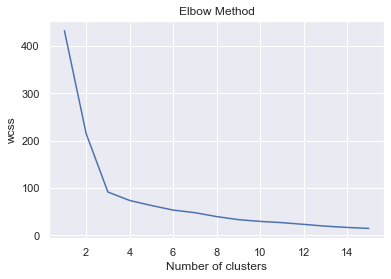

In [276]:
plt.plot(range(1,16),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Text(0, 0.5, 'interaction channel')

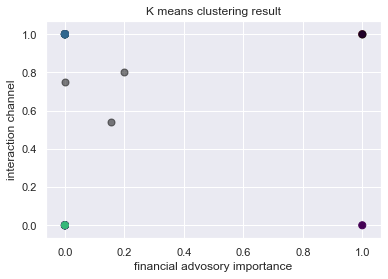

In [326]:
kmeans = KMeans(n_clusters=4) # 4 is optinal K, compared to 3 can better distinguish FA importance
kmeans.fit(Xval)
y_kmeans = kmeans.predict(Xval)

#  financial advosory importance vs interaction channel
plt.scatter(Xval[:, 4], Xval[:, 5], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 4], centers[:, 5], c='black', s=50, alpha=0.5)
plt.title('K means clustering result')
plt.xlabel('financial advosory importance')
plt.ylabel('interaction channel')

In [327]:
Xk['cluster'] = y_kmeans
kgroup = Xk.groupby('cluster')
kgroup.mean()


,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q11_1,Q11_2,Q11_3,Q17,Q18,Q19,Q21
cluster,,,,,,,,,,,,
0,0.923077,0.615385,0.153846,0.076923,0.153846,0.538462,0.692308,0.384615,1996.538462,1.538462,5.0,1.153846
1,1.000000,0.800000,0.400000,0.200000,0.200000,0.800000,0.800000,0.400000,1990.400000,1.200000,6.6,6.400000
2,0.750000,0.750000,0.125000,0.000000,0.000000,0.750000,0.500000,0.625000,1996.625000,1.875000,5.0,6.250000
3,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1993.000000,2.000000,7.0,1.000000


In [328]:
kgroup.describe()

Q3_1                                               Q3_2            \
        count      mean      std  min   25%  50%  75%  max count      mean   
cluster                                                                      
0        13.0  0.923077  0.27735  0.0  1.00  1.0  1.0  1.0  13.0  0.615385   
1         5.0  1.000000  0.00000  1.0  1.00  1.0  1.0  1.0   5.0  0.800000   
2         8.0  0.750000  0.46291  0.0  0.75  1.0  1.0  1.0   8.0  0.750000   
3         1.0  1.000000      NaN  1.0  1.00  1.0  1.0  1.0   1.0  1.000000   

         ...  Q19        Q21                                                
         ...  75%  max count      mean       std  min   25%  50%  75%  max  
cluster  ...                                                                
0        ...  5.0  5.0  13.0  1.153846  0.375534  1.0  1.00  1.0  1.0  2.0  
1        ...  8.0  8.0   5.0  6.400000  0.547723  6.0  6.00  6.0  7.0  7.0  
2        ...  5.0  5.0   8.0  6.250000  1.164965  4.0  5.75  7.0  7.0  7.0  
3        ...  7.0  7.0   1.0  1.000000       NaN  1.0  1.00  1.0  1.0  1.0  

[4 rows x 96 columns]

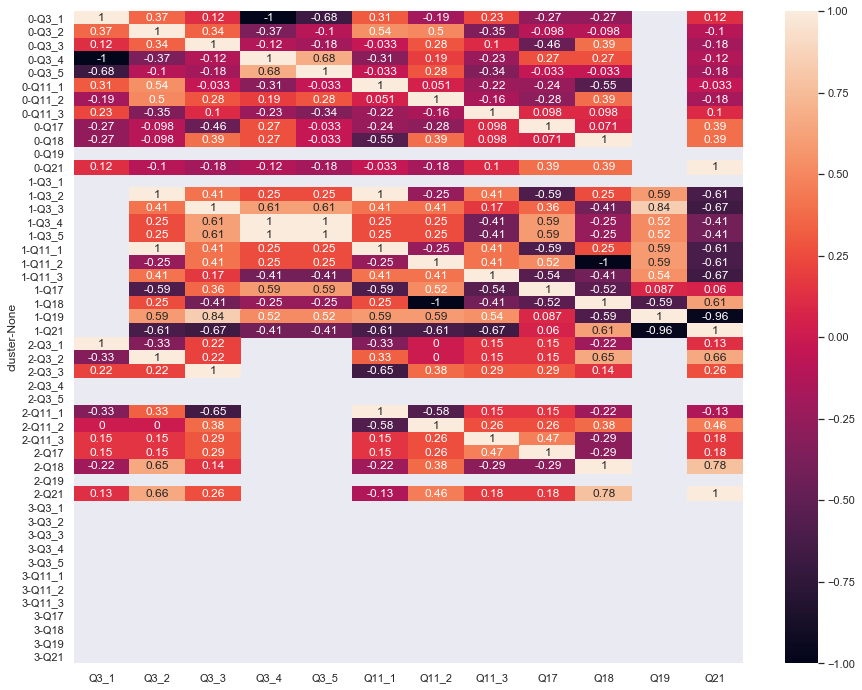

In [329]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,12))
corrMatrixg = kgroup.corr()
sns.heatmap(corrMatrixg,annot=True)
plt.show()


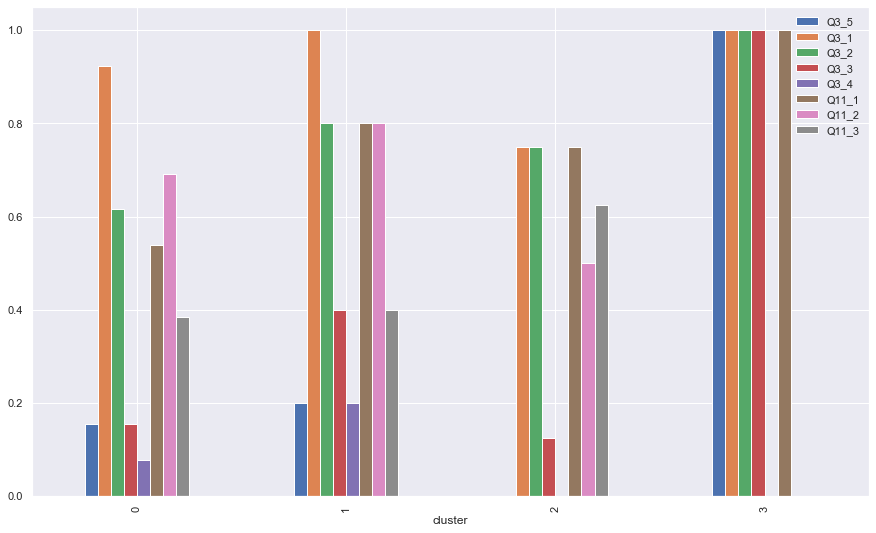

In [330]:
fig, ax = plt.subplots(figsize=(15,9))
kgroup['Q3_5','Q3_1','Q3_2','Q3_3','Q3_4','Q11_1','Q11_2','Q11_3'].mean().plot(kind='bar',legend=True,stacked = False,ax = ax)
ax.legend(loc='upper right', frameon=False)


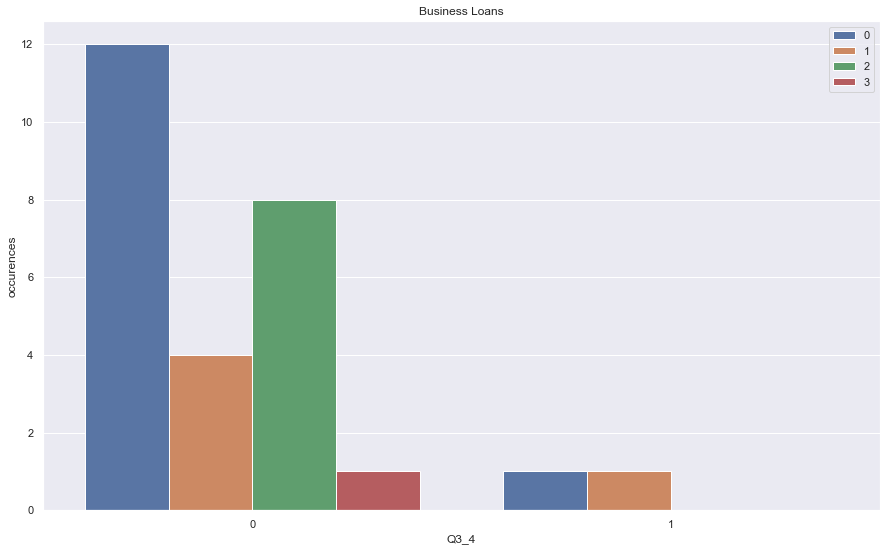

In [331]:
fig, ax = plt.subplots(figsize=(15,9))
kgroup2 = Xk.groupby(['cluster','Q3_4'])
aa = kgroup2.size().to_frame('occurences').reset_index()
sns.barplot(x='Q3_4', y='occurences', hue='cluster', data=aa, ax=ax)
plt.title('Business Loans')
ax.legend(loc='upper right', frameon=True)

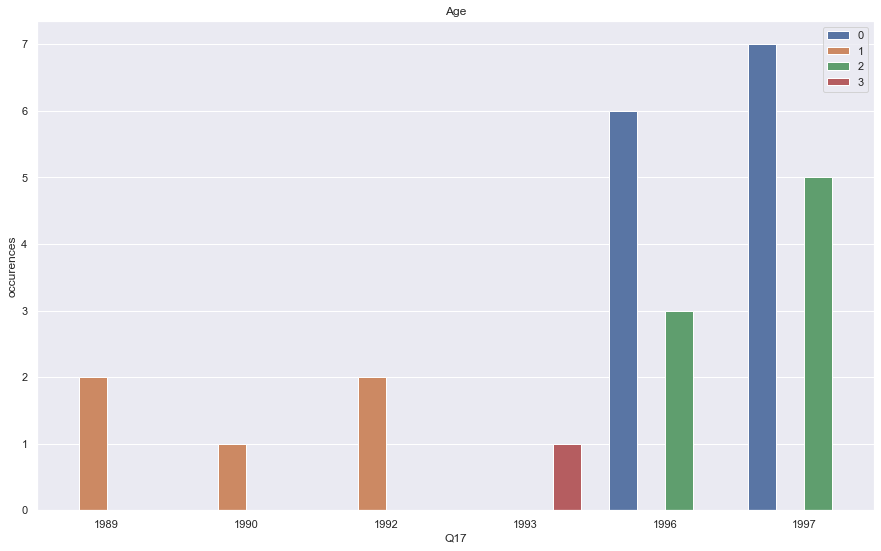

In [332]:
fig, ax = plt.subplots(figsize=(15,9))
kgroup2 = Xk.groupby(['cluster','Q17'])
aa = kgroup2.size().to_frame('occurences').reset_index()
sns.barplot(x='Q17', y='occurences', hue='cluster', data=aa, ax=ax)
plt.title('Age')
ax.legend(loc='upper right', frameon=True)

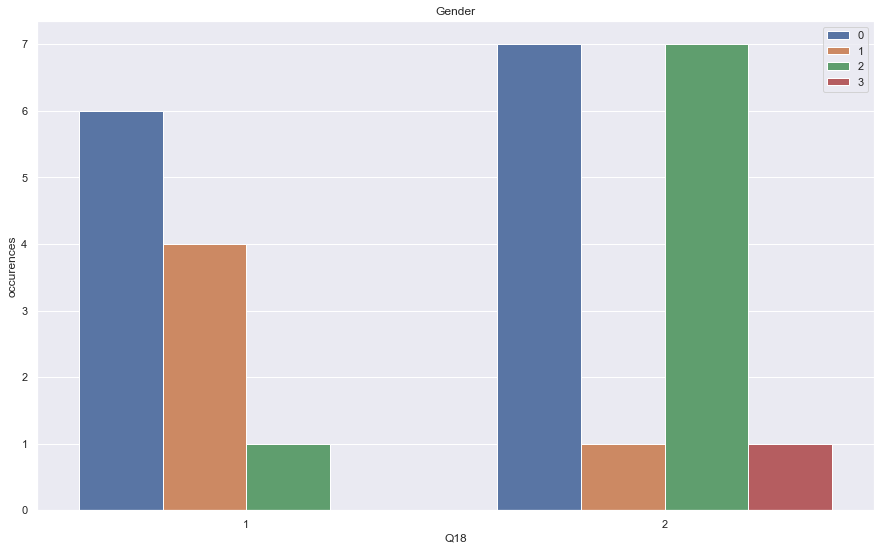

In [333]:
fig, ax = plt.subplots(figsize=(15,9))
kgroup2 = Xk.groupby(['cluster','Q18'])
aa = kgroup2.size().to_frame('occurences').reset_index()
sns.barplot(x='Q18', y='occurences', hue='cluster', data=aa, ax=ax)
plt.title('Gender')
ax.legend(loc='upper right', frameon=True)

Text(0.5, 1.0, 'Pysical Bank Branch')

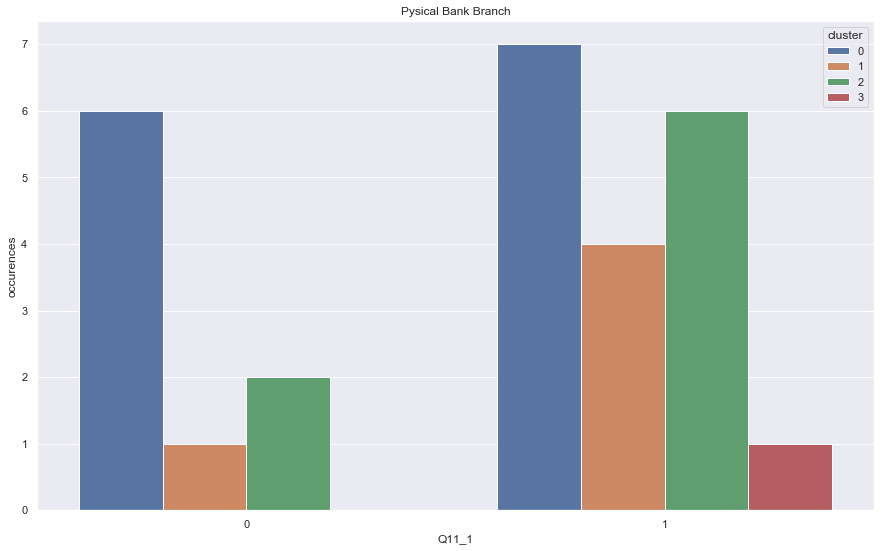

In [334]:
fig, ax = plt.subplots(figsize=(15,9))
kgroup2 = Xk.groupby(['cluster','Q11_1'])
aa = kgroup2.size().to_frame('occurences').reset_index()
sns.barplot(x='Q11_1', y='occurences', hue='cluster', data=aa, ax=ax)
plt.title('Pysical Bank Branch')

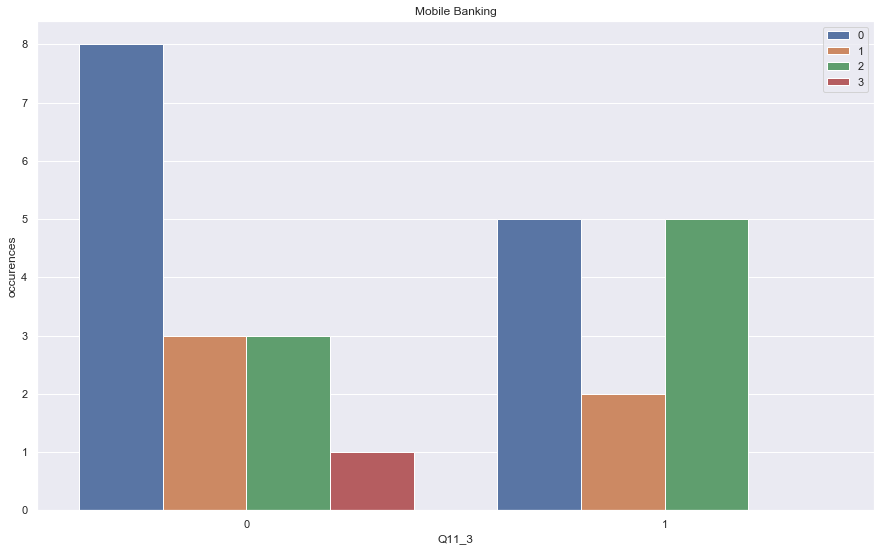

In [335]:
fig, ax = plt.subplots(figsize=(15,9))
kgroup2 = Xk.groupby(['cluster','Q11_3'])
aa = kgroup2.size().to_frame('occurences').reset_index()
sns.barplot(x='Q11_3', y='occurences', hue='cluster', data=aa, ax=ax)
plt.title('Mobile Banking')
ax.legend(loc='upper right', frameon=True)

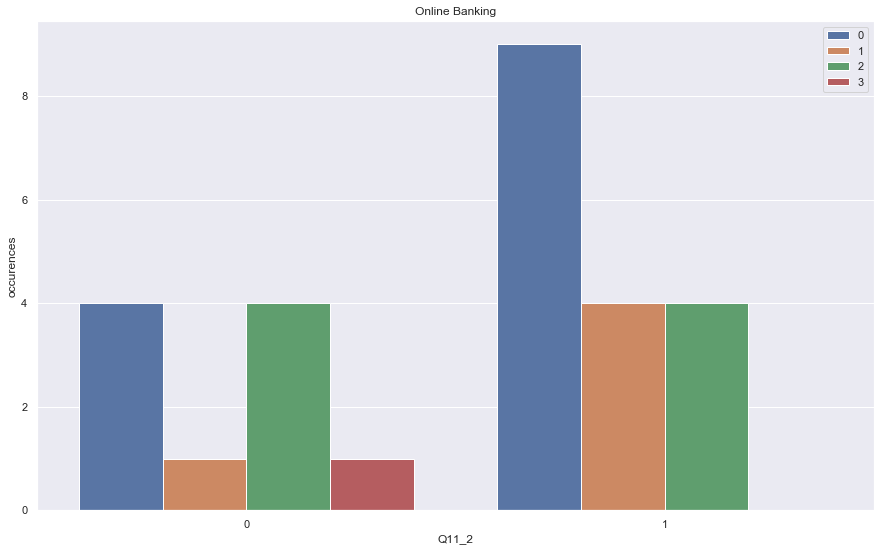

In [336]:
fig, ax = plt.subplots(figsize=(15,9))
kgroup2 = Xk.groupby(['cluster','Q11_2'])
aa = kgroup2.size().to_frame('occurences').reset_index()
sns.barplot(x='Q11_2', y='occurences', hue='cluster', data=aa, ax=ax)
plt.title('Online Banking')
ax.legend(loc='upper right', frameon=True)

Text(0.5, 1.0, 'Education Level')

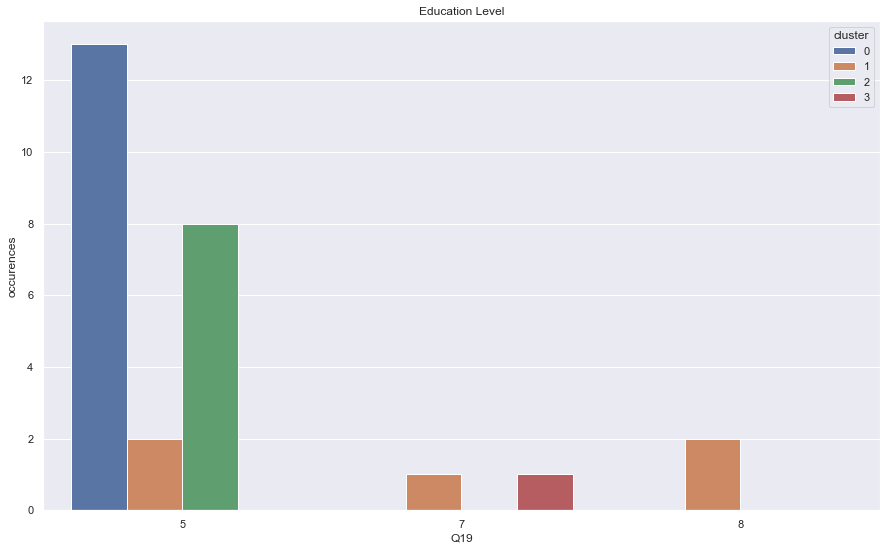

In [337]:
fig, ax = plt.subplots(figsize=(15,9))
kgroup2 = Xk.groupby(['cluster','Q19'])
aa = kgroup2.size().to_frame('occurences').reset_index()
sns.barplot(x='Q19', y='occurences', hue='cluster', data=aa, ax=ax)
plt.title('Education Level')


Text(0.5, 1.0, 'Deposits')

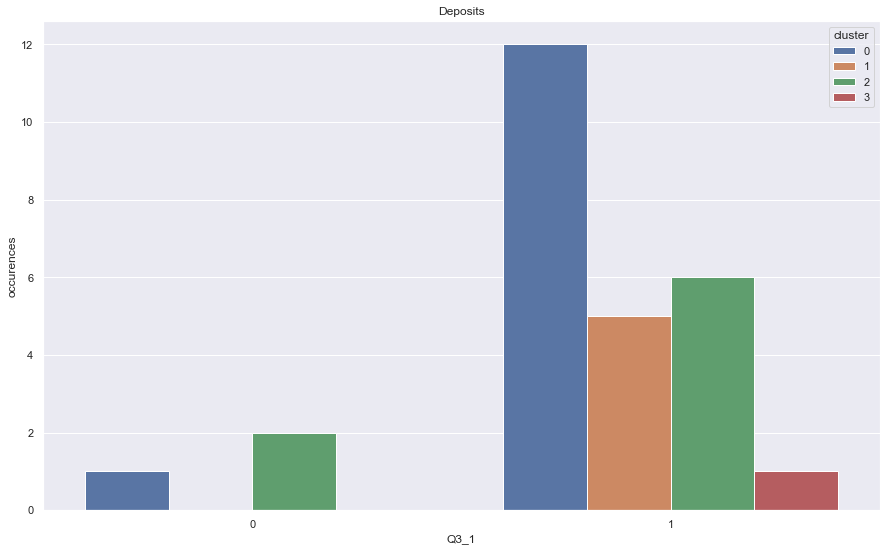

In [338]:
fig, ax = plt.subplots(figsize=(15,9))
kgroup2 = Xk.groupby(['cluster','Q3_1'])
aa = kgroup2.size().to_frame('occurences').reset_index()
sns.barplot(x='Q3_1', y='occurences', hue='cluster', data=aa, ax=ax)
plt.title('Deposits')

Text(0.5, 1.0, 'Payments')

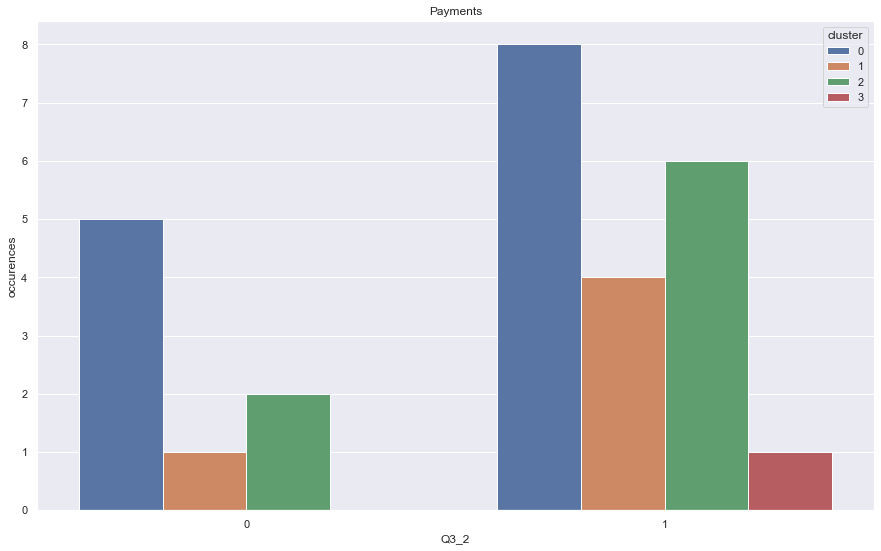

In [339]:
fig, ax = plt.subplots(figsize=(15,9))
kgroup2 = Xk.groupby(['cluster','Q3_2'])
aa = kgroup2.size().to_frame('occurences').reset_index()
sns.barplot(x='Q3_2', y='occurences', hue='cluster', data=aa, ax=ax)
plt.title('Payments')

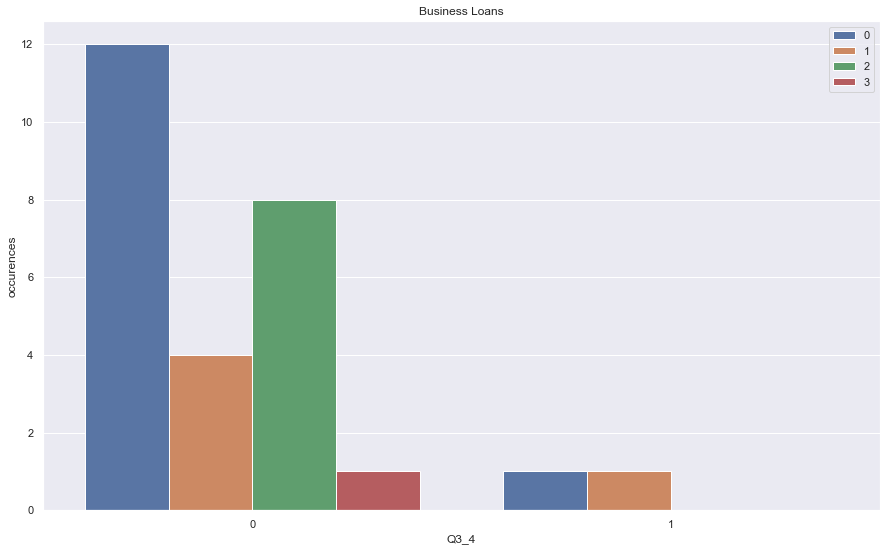

In [340]:
fig, ax = plt.subplots(figsize=(15,9))
kgroup2 = Xk.groupby(['cluster','Q3_4'])
aa = kgroup2.size().to_frame('occurences').reset_index()
sns.barplot(x='Q3_4', y='occurences', hue='cluster', data=aa, ax=ax)
plt.title('Business Loans')
ax.legend(loc='upper right', frameon=True)

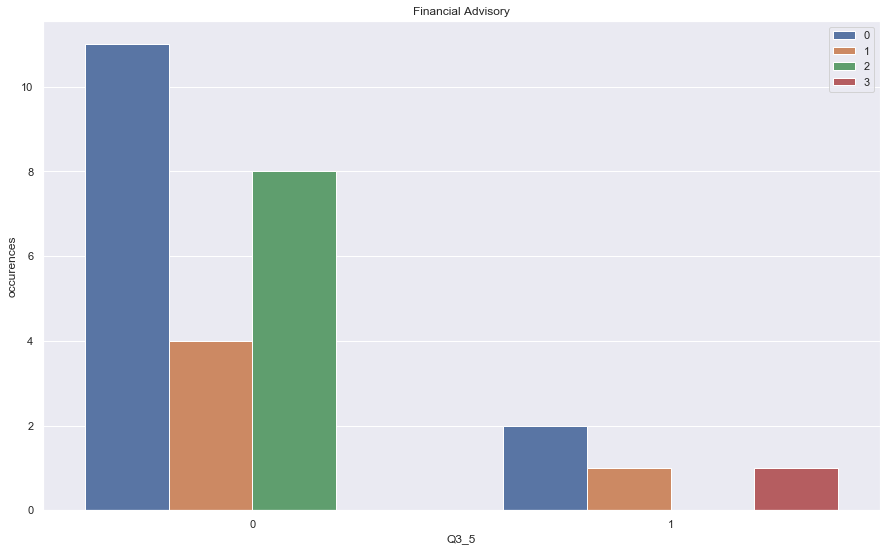

In [341]:
fig, ax = plt.subplots(figsize=(15,9))
kgroup2 = Xk.groupby(['cluster','Q3_5'])
aa = kgroup2.size().to_frame('occurences').reset_index()
sns.barplot(x='Q3_5', y='occurences', hue='cluster', data=aa, ax=ax)
plt.title('Financial Advisory')
ax.legend(loc='upper right', frameon=True)

Text(0.5, 1.0, 'Education Level')

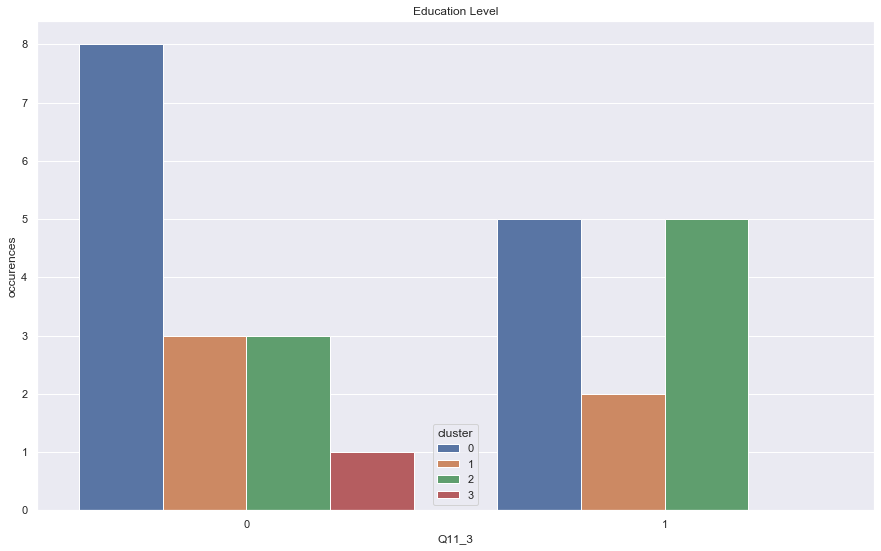

In [342]:
fig, ax = plt.subplots(figsize=(15,9))
kgroup2 = Xk.groupby(['cluster','Q11_3'])
aa = kgroup2.size().to_frame('occurences').reset_index()
sns.barplot(x='Q11_3', y='occurences', hue='cluster', data=aa, ax=ax)
plt.title('Education Level')

# Correlation

In [343]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

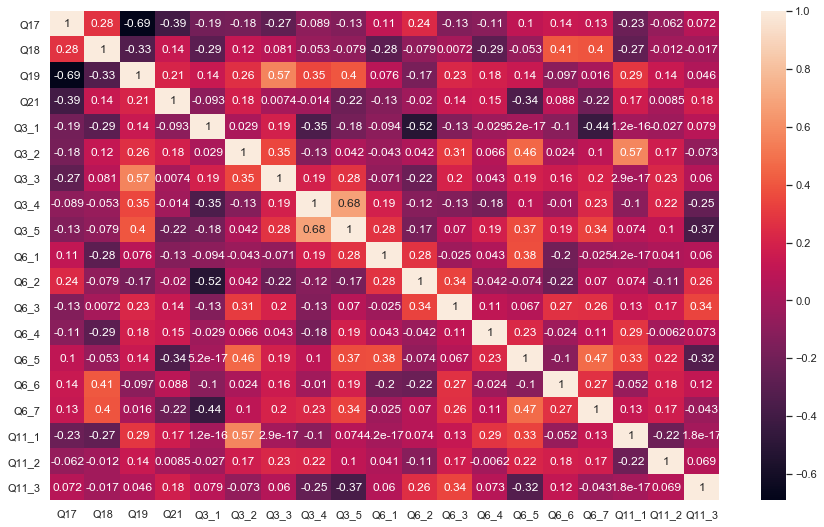

In [344]:
fig, ax = plt.subplots(figsize=(15,9))
corrMatrix = dfk.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()

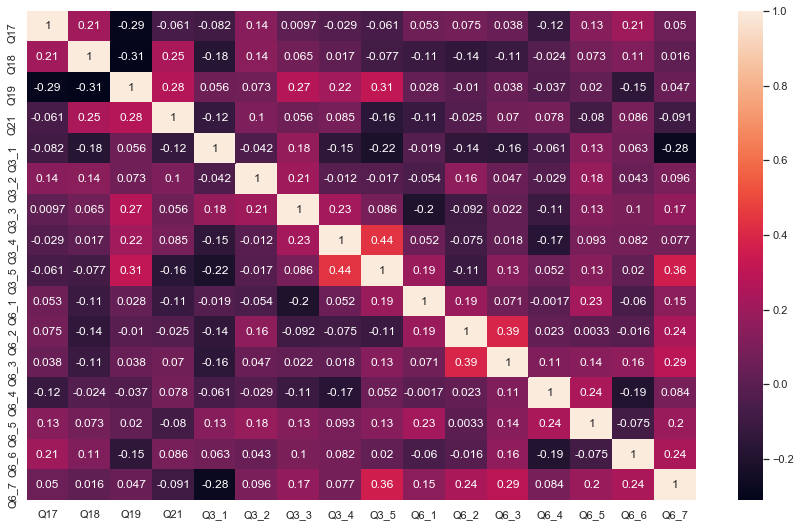

In [345]:
fig, ax = plt.subplots(figsize=(15,9))
corrMatrix = dfkk.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()

# Decision tree

In [387]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV

y = dfk['Q3_5']
X = dfk.drop(['Q3_5'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

parameters = {'max_depth':range(3,20)}
# Create Decision Tree classifer object
clf = GridSearchCV(DecisionTreeClassifier(),parameters, n_jobs=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [388]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



### Cross Validation

In [389]:
pd.DataFrame(clf.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003158,0.000216,0.002333,0.000451,3,{'max_depth': 3},0.4,1.0,0.75,0.25,0.5,0.58,0.265707,17
1,0.003029,0.000244,0.002122,0.000338,4,{'max_depth': 4},0.6,1.0,0.75,0.50,0.5,0.67,0.188680,1
2,0.003537,0.000779,0.001983,0.000207,5,{'max_depth': 5},0.6,1.0,0.75,0.25,0.5,0.62,0.250200,13
3,0.002814,0.000133,0.002121,0.000410,6,{'max_depth': 6},0.6,1.0,0.75,0.50,0.5,0.67,0.188680,1
4,0.002851,0.000335,0.001834,0.000040,7,{'max_depth': 7},0.4,1.0,0.75,0.50,0.5,0.63,0.218174,10


In [390]:
clf.best_params_

{'max_depth': 4}

### Model training and prediction

In [385]:
y = dfk['Q3_5']
X = dfk.drop(['Q3_5'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 4,criterion = 'entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


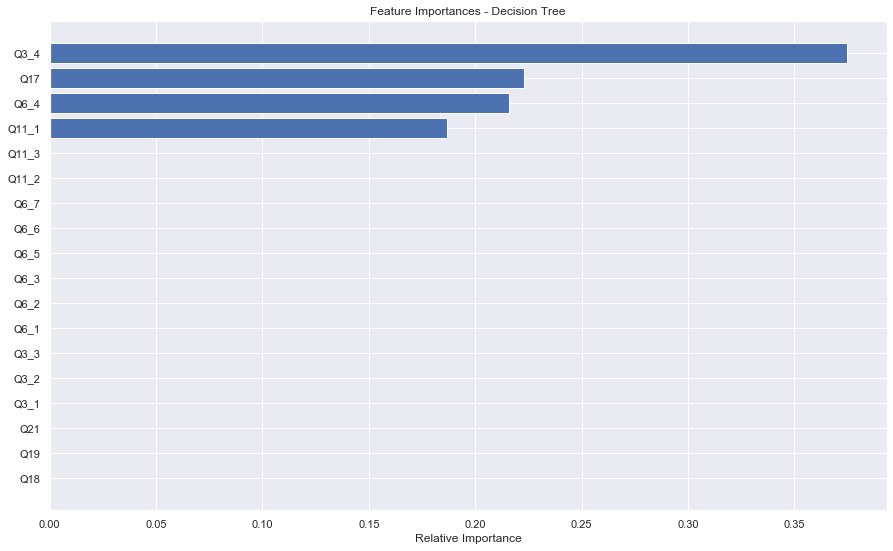

In [386]:
most_important_names = [i for i in X.columns]
zipped_feats = zip(most_important_names,clf.feature_importances_)
zipped_feats = sorted(zipped_feats, key=lambda x: x[1], reverse=False)
features, importances = zip(*zipped_feats)

fig, ax = plt.subplots(figsize=(15,9))
plt.title('Feature Importances - Decision Tree')
plt.barh(range(len(importances)), importances, color='b', align='center')
plt.yticks(range(len(importances)), features)
plt.xlabel('Relative Importance')
plt.show()

### SMOTE

In [304]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

os = SMOTE(k_neighbors=3,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  40
Number of no subscription in oversampled data 0
Number of subscription 0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


# JACCARD

In [393]:
dfna = df2.iloc[:,20:52].apply(lambda x: x.fillna(x.median()),axis=0)
farating = dfna.iloc[:,20:52].astype(np.int64)
# farating = df5.fillna(df5.median(), inplace=True)
farating.index = farating.index.set_names(['user_id'])
farating.head()

,Q8_3_18,Q8_3_19,Q8_3_20,Q8_3_21,Q8_4_1,Q8_4_2,Q8_4_16,Q8_4_17,Q8_4_18,Q8_4_19,Q8_4_20,Q8_4_21
user_id,,,,,,,,,,,,
3,3,2,3,0,3,1,0,3,2,1,3,0
4,3,2,3,0,3,0,0,3,2,1,3,0
5,3,2,3,0,4,3,0,3,2,1,3,0
11,4,3,5,5,5,3,2,3,2,3,5,4
18,3,2,3,0,3,1,0,3,2,1,3,0


In [394]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard
res = 1 - pdist(farating, 'jaccard')
squareform(res)
distance = pd.DataFrame(squareform(res), index=farating.index, columns= farating.index)
distance

user_id,3,4,5,11,18,21,25,35,47,60,...,86,90,91,94,99,100,101,103,108,109
user_id,,,,,,,,,,,,,,,,,,,,,
3,0.000000,0.888889,0.777778,0.166667,1.000000,0.111111,0.333333,0.222222,0.000000,0.000000,...,0.083333,0.000000,0.222222,0.000000,0.000000,0.000000,0.333333,0.250000,0.111111,0.111111
4,0.888889,0.000000,0.777778,0.166667,0.888889,0.125000,0.375000,0.250000,0.000000,0.000000,...,0.083333,0.000000,0.250000,0.000000,0.000000,0.000000,0.333333,0.166667,0.111111,0.125000
5,0.777778,0.777778,0.000000,0.250000,0.777778,0.111111,0.222222,0.333333,0.000000,0.111111,...,0.083333,0.000000,0.222222,0.111111,0.000000,0.000000,0.444444,0.166667,0.111111,0.000000
11,0.166667,0.166667,0.250000,0.000000,0.166667,0.250000,0.000000,0.000000,0.166667,0.000000,...,0.000000,0.000000,0.083333,0.083333,0.333333,0.000000,0.250000,0.083333,0.083333,0.083333
18,1.000000,0.888889,0.777778,0.166667,0.000000,0.111111,0.333333,0.222222,0.000000,0.000000,...,0.083333,0.000000,0.222222,0.000000,0.000000,0.000000,0.333333,0.250000,0.111111,0.111111
21,0.111111,0.125000,0.111111,0.250000,0.111111,0.000000,0.166667,0.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.166667,0.083333,0.400000,0.000000,0.250000,0.000000,0.125000
25,0.333333,0.375000,0.222222,0.000000,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.166667,0.166667,0.166667,0.000000,0.166667,0.222222,0.083333,0.142857,0.125000
35,0.222222,0.250000,0.333333,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.125000,...,0.166667,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
47,0.000000,0.000000,0.000000,0.166667,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.166667


In [395]:
distance.style.applymap(lambda x: 'background-color : yellow' if x>0.6 else '')

user_id,3,4,5,11,18,21,25,35,47,60,62,63,64,77,78,82,85,86,90,91,94,99,100,101,103,108,109
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,0.000000,0.888889,0.777778,0.166667,1.000000,0.111111,0.333333,0.222222,0.000000,0.000000,1.000000,0.200000,0.333333,0.111111,0.083333,0.250000,1.000000,0.083333,0.000000,0.222222,0.000000,0.000000,0.000000,0.333333,0.250000,0.111111,0.111111
4,0.888889,0.000000,0.777778,0.166667,0.888889,0.125000,0.375000,0.250000,0.000000,0.000000,0.888889,0.200000,0.333333,0.125000,0.083333,0.250000,0.888889,0.083333,0.000000,0.250000,0.000000,0.000000,0.000000,0.333333,0.166667,0.111111,0.125000
5,0.777778,0.777778,0.000000,0.250000,0.777778,0.111111,0.222222,0.333333,0.000000,0.111111,0.777778,0.200000,0.500000,0.111111,0.250000,0.250000,0.777778,0.083333,0.000000,0.222222,0.111111,0.000000,0.000000,0.444444,0.166667,0.111111,0.000000
11,0.166667,0.166667,0.250000,0.000000,0.166667,0.250000,0.000000,0.000000,0.166667,0.000000,0.166667,0.166667,0.333333,0.083333,0.166667,0.250000,0.166667,0.000000,0.000000,0.083333,0.083333,0.333333,0.000000,0.250000,0.083333,0.083333,0.083333
18,1.000000,0.888889,0.777778,0.166667,0.000000,0.111111,0.333333,0.222222,0.000000,0.000000,1.000000,0.200000,0.333333,0.111111,0.083333,0.250000,1.000000,0.083333,0.000000,0.222222,0.000000,0.000000,0.000000,0.333333,0.250000,0.111111,0.111111
21,0.111111,0.125000,0.111111,0.250000,0.111111,0.000000,0.166667,0.000000,0.200000,0.000000,0.111111,0.000000,0.083333,0.200000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.166667,0.083333,0.400000,0.000000,0.250000,0.000000,0.125000
25,0.333333,0.375000,0.222222,0.000000,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.333333,0.300000,0.166667,0.000000,0.083333,0.166667,0.333333,0.000000,0.166667,0.166667,0.166667,0.000000,0.166667,0.222222,0.083333,0.142857,0.125000
35,0.222222,0.250000,0.333333,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.125000,0.222222,0.000000,0.083333,0.000000,0.166667,0.083333,0.222222,0.166667,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
47,0.000000,0.000000,0.000000,0.166667,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.166667


In [397]:
top_similar_users = distance.apply(lambda s, n: pd.Series(s.nlargest(n).index), axis=1, n=3)
top_similar_users.index = top_similar_users.index.set_names(['user_id'])
top_similar_users

,0,1,2
user_id,,,
3,18,62,85
4,3,18,62
5,3,4,18
11,64,99,5
18,3,62,85
21,100,11,103
25,4,3,18
35,5,4,3
47,99,21,11


In [398]:
recdf2 = top_similar_users.join(farating, on = 'user_id')
recdf2.head()

,0,1,2,Q8_3_18,Q8_3_19,Q8_3_20,Q8_3_21,Q8_4_1,Q8_4_2,Q8_4_16,Q8_4_17,Q8_4_18,Q8_4_19,Q8_4_20,Q8_4_21
user_id,,,,,,,,,,,,,,,
3,18,62,85,3,2,3,0,3,1,0,3,2,1,3,0
4,3,18,62,3,2,3,0,3,0,0,3,2,1,3,0
5,3,4,18,3,2,3,0,4,3,0,3,2,1,3,0
11,64,99,5,4,3,5,5,5,3,2,3,2,3,5,4
18,3,62,85,3,2,3,0,3,1,0,3,2,1,3,0


In [399]:
suffix = ['_1','_2','_16','_17','_18','_19','_20']
for i in range(len(suffix)):
    recdf2['fa_%s' %i] = recdf2.iloc[:,recdf2.columns.str.endswith(suffix[i])==True].mean(axis=1)
recdf2.head()

,0,1,2,Q8_3_18,Q8_3_19,Q8_3_20,Q8_3_21,Q8_4_1,Q8_4_2,Q8_4_16,...,Q8_4_19,Q8_4_20,Q8_4_21,fa_0,fa_1,fa_2,fa_3,fa_4,fa_5,fa_6
user_id,,,,,,,,,,,,,,,,,,,,,
3,18,62,85,3,2,3,0,3,1,0,...,1,3,0,3.0,1.0,0.0,3.0,2.5,1.5,3.0
4,3,18,62,3,2,3,0,3,0,0,...,1,3,0,3.0,0.0,0.0,3.0,2.5,1.5,3.0
5,3,4,18,3,2,3,0,4,3,0,...,1,3,0,4.0,3.0,0.0,3.0,2.5,1.5,3.0
11,64,99,5,4,3,5,5,5,3,2,...,3,5,4,5.0,3.0,2.0,3.0,3.0,3.0,5.0
18,3,62,85,3,2,3,0,3,1,0,...,1,3,0,3.0,1.0,0.0,3.0,2.5,1.5,3.0


In [400]:
import operator
falist2 = []
scorelist2 = []

for i, j in recdf2.iloc[:,:3].iterrows(): 
    
   
    avgscore0 = (recdf2[recdf2.index== j[0]].iloc[ :, -7].mean() +  recdf2[recdf2.index== j[1]].iloc[ :, -7].mean() +\
                recdf2[recdf2.index== j[2]].iloc[ :, -7].mean())/3
    avgscore1 = (recdf2[recdf2.index== j[0]].iloc[ :, -6].mean() +  recdf2[recdf2.index== j[1]].iloc[ :, -6].mean() +\
                recdf2[recdf2.index== j[2]].iloc[ :, -6].mean())/3
    avgscore2 = (recdf2[recdf2.index== j[0]].iloc[ :, -5].mean() +  recdf2[recdf2.index== j[1]].iloc[ :, -5].mean() +\
                recdf2[recdf2.index== j[2]].iloc[ :, -5].mean())/3
    avgscore3 = (recdf2[recdf2.index== j[0]].iloc[ :, -4].mean() +  recdf2[recdf2.index== j[1]].iloc[ :, -4].mean() +\
                recdf2[recdf2.index== j[2]].iloc[ :, -4].mean())/3
    avgscore4 = (recdf2[recdf2.index== j[0]].iloc[ :, -3].mean() +  recdf2[recdf2.index== j[1]].iloc[ :, -3].mean() +\
                recdf2[recdf2.index== j[2]].iloc[ :, -3].mean())/3
    avgscore5 = (recdf2[recdf2.index== j[0]].iloc[ :, -2].mean() +  recdf2[recdf2.index== j[1]].iloc[ :, -2].mean() +\
                recdf2[recdf2.index== j[2]].iloc[ :, -2].mean())/3
    avgscore6 = (recdf2[recdf2.index== j[0]].iloc[ :, -1].mean() +  recdf2[recdf2.index== j[1]].iloc[ :, -1].mean() +\
                recdf2[recdf2.index== j[2]].iloc[ :, -1].mean())/3
    score = [avgscore0,avgscore1,avgscore2,avgscore3,avgscore4,avgscore5,avgscore6]

    topfa, maxscore = max(enumerate(score), key=operator.itemgetter(1))
    falist2.append(topfa)
    scorelist2.append(maxscore)

In [401]:
recfa2 = pd.DataFrame(list(zip(recdf2.index.values.tolist(), falist2, scorelist2)), columns =['user_id','recommendation', 'score']) 

In [402]:
Xk.index = Xk.index.set_names(['user_id'])
final2 = Xk.reset_index().merge(recfa2, how="left")
finalgroup2 = final2.groupby('cluster')
final2

,user_id,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q11_1,Q11_2,Q11_3,Q17,Q18,Q19,Q21,cluster,recommendation,score
0,3,0,0,0,1,1,0,1,0,1997,2,5,1,0,0,3.000000
1,4,1,1,0,0,0,1,0,0,1989,2,5,7,1,0,3.000000
2,5,1,1,1,0,0,0,1,1,1997,2,5,7,2,0,3.000000
3,11,1,0,0,0,0,0,0,1,1997,1,5,1,0,0,4.333333
4,18,1,1,0,0,0,1,0,0,1997,2,5,7,2,0,3.000000
5,21,1,1,1,0,0,1,1,1,1990,1,8,6,1,6,3.000000
6,25,1,1,0,0,0,1,0,1,1996,2,5,7,2,0,3.000000
7,35,1,1,1,1,1,1,1,0,1992,1,8,6,1,0,3.333333
8,47,1,1,1,0,0,1,1,1,1996,2,5,1,0,6,4.333333
9,60,1,1,1,0,1,1,0,0,1993,2,7,1,3,4,3.833333


Text(0.5, 1.0, 'Fiancial Advisory Product Recommendation')

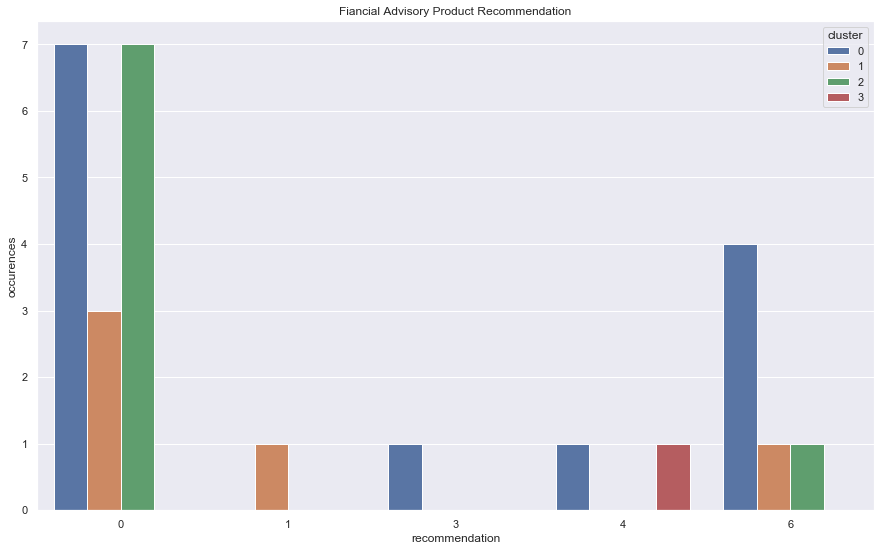

In [403]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,9))
finalgroup2 = final2.groupby(['cluster','recommendation'])
aa = finalgroup2.size().to_frame('occurences').reset_index()
sns.barplot(x='recommendation', y='occurences', hue='cluster', data=aa)
plt.title('Fiancial Advisory Product Recommendation')

Recommendation is based on both collaborative filtering and cluster attributes. Variations may due to limitaiton of sample size. 